In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to python environment

In [2]:
data=pd.read_excel(r'C:\Users\sreelekshmy\Downloads\iris (3).xls')

# 2. Do the necessary pre-processing steps

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.shape

(150, 5)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#check missing values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
freqgraph=data.select_dtypes(include=['float'])

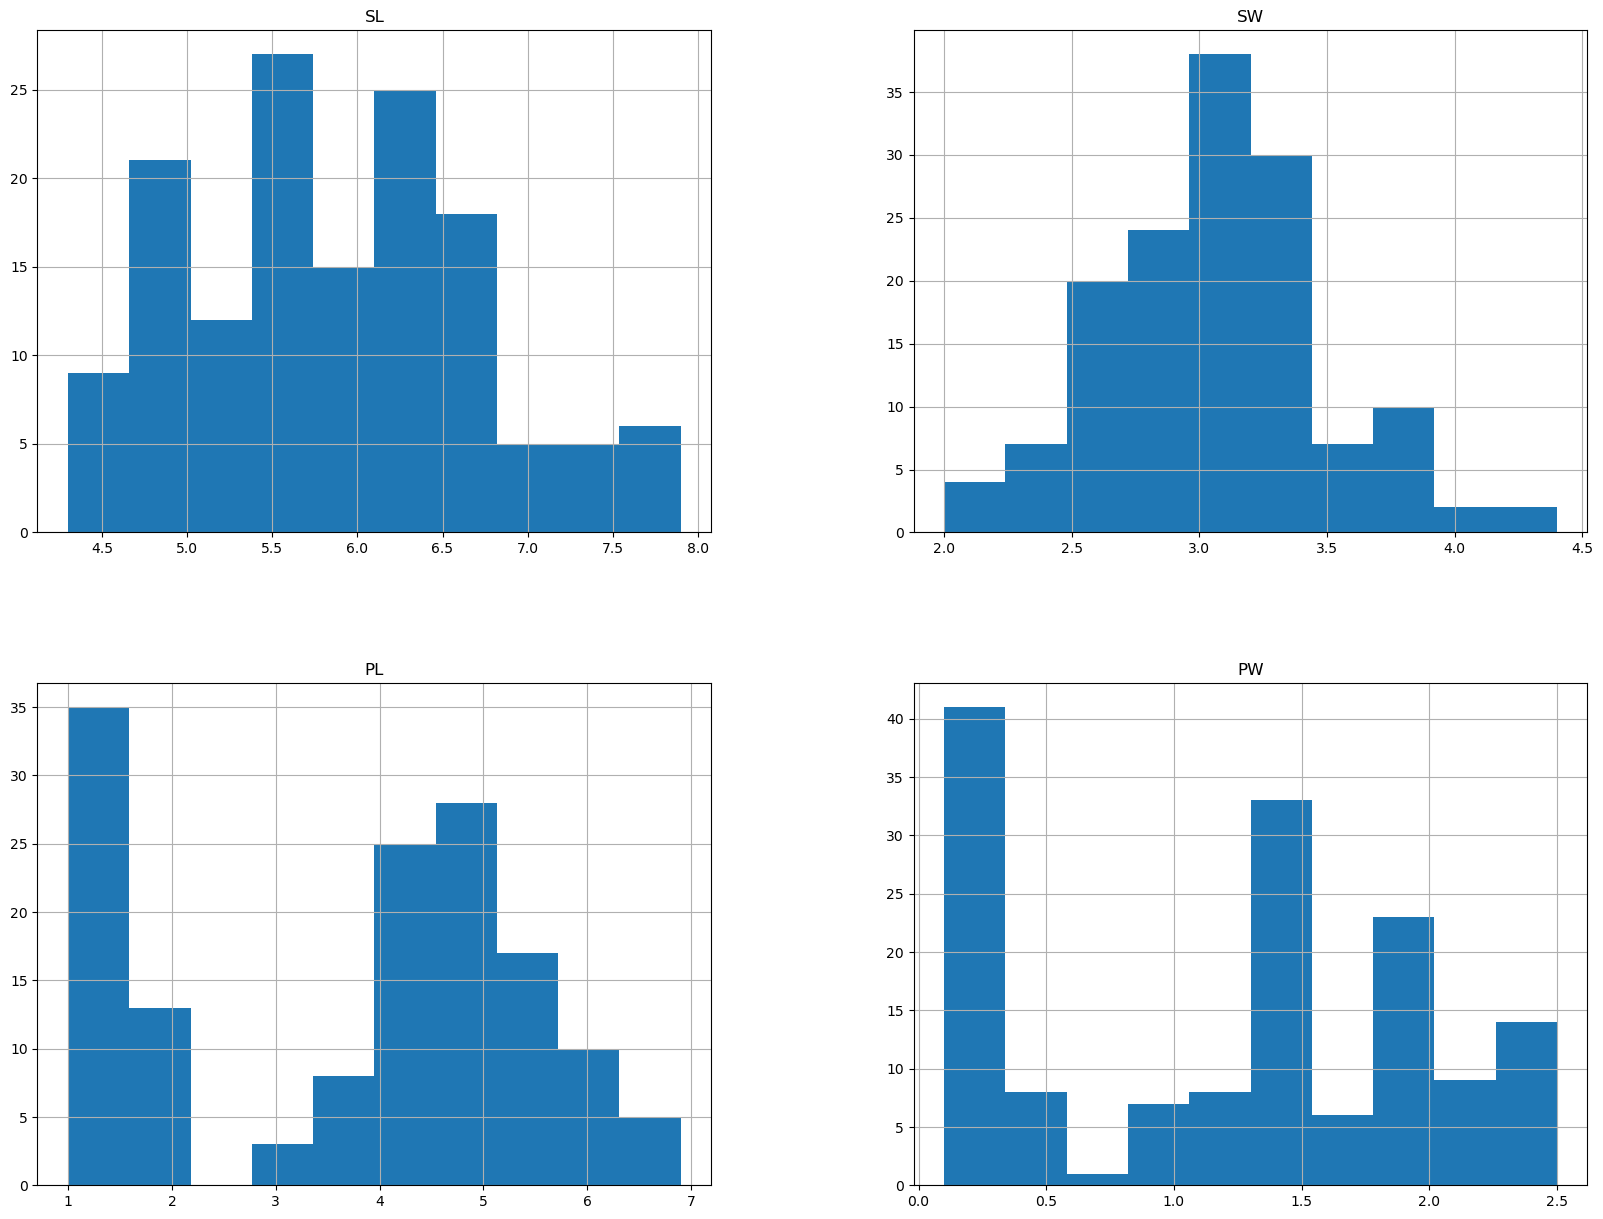

In [9]:
#let us check distribution to decide whether the mean or median is used to fill the missing value
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
#lets fill SL and PL with there median
data['SL']=data['SL'].fillna(data['SL'].median())
data['PL']=data['PL'].fillna(data['PL'].median())
data['SW']=data['SW'].fillna(data['SW'].mean())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [12]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

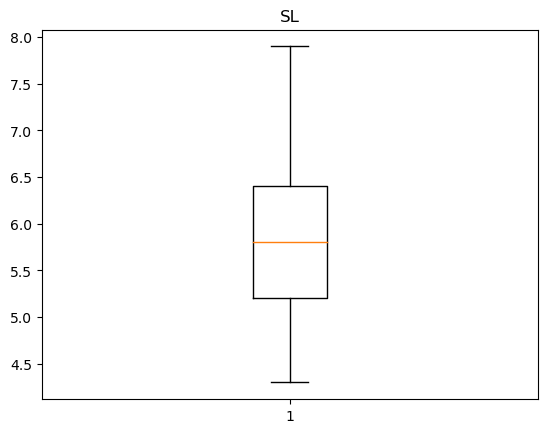

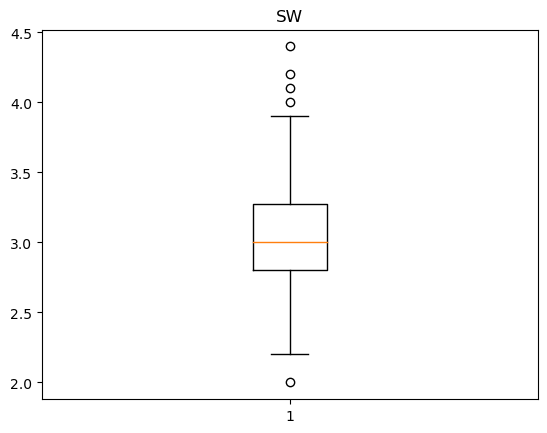

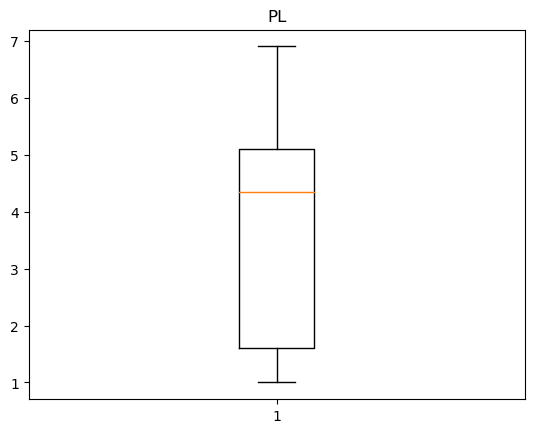

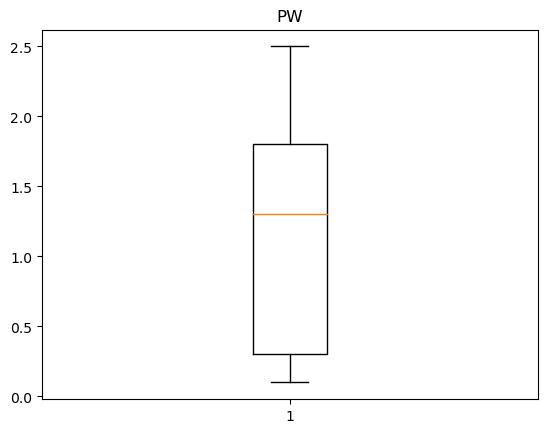

In [13]:
#Lets check the outliers. For that plot boxplot
num_col=['SL', 'SW', 'PL', 'PW']
for i in num_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [14]:
#trimming the outliers
Q1=data['SW'].quantile(0.25)
Q2=data['SW'].quantile(0.50)
Q3=data['SW'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

2.8
3.0
3.275
0.4750000000000001


In [15]:
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)
data['SW']=np.where(data['SW']>upper,upper,np.where(data['SW']<lower,lower,data['SW']))

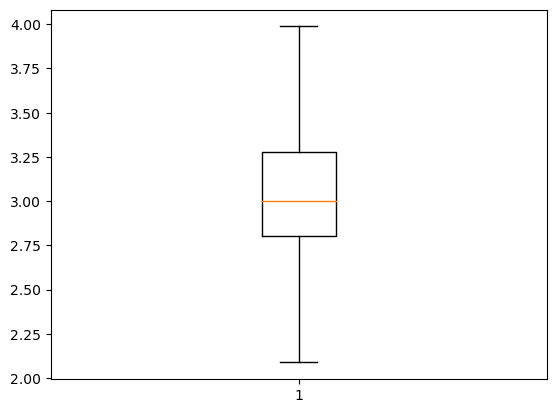

In [16]:
plt.boxplot(data['SW'])
plt.show()

# Encoding classification column using label encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
#creating an instance
le=LabelEncoder()

In [19]:
#fit and transform to numeric
data['Classification']=le.fit_transform(data['Classification'])

In [20]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2
149,5.9,3.0,5.10,1.8,2


In [22]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [ ]:
iris-setosa- 0, iris-versicolor- 1, iris-verginica- 2

# 3. Find out which classification model gives the best result (try all theclassification algorithms discussed in the session)

In [23]:
#Lets split the dataset into X and y variables
#In X independent features and in y target column
X=data.drop('Classification',axis=1)
y=data['Classification']

In [24]:
#now lets split data into training and testing for model building
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

# Model1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [27]:
#creating instance
lr=LogisticRegression()
#fitting the model
lr.fit(X_train,y_train)
#predicting
y_pred_lr=lr.predict(X_test)

C:\Users\sreelekshmy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
print('Accuracy= ',accuracy_score(y_test,y_pred_lr))
print('precison= ',precision_score(y_test,y_pred_lr,average='weighted'))
print('recall= ',recall_score(y_test,y_pred_lr,average='weighted'))
print('f1 score= ',f1_score(y_test,y_pred_lr,average='weighted'))

Accuracy=  1.0
precison=  1.0
recall=  1.0
f1 score=  1.0


 confusion_matrix(y_test,y_pred_lr)

# Model 2. K–Nearest Neighbor (KNN) Classification

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
metric_k=[]
neighbors=np.arange(1,20)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

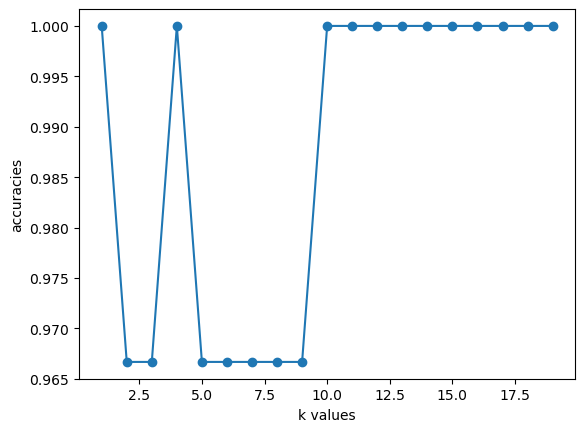

In [32]:
#we can plot it to find the  k value that gives best accuracy 
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.show()

In [33]:
#Lets take k as 15 here
#Creating an instance
knn=KNeighborsClassifier(n_neighbors=15)
#Fit the model
knn.fit(X_train,y_train)
#Prediction
y_pred_knn=knn.predict(X_test)

In [34]:
print('Accuracy= ',accuracy_score(y_test,y_pred_knn))
print('precison= ',precision_score(y_test,y_pred_knn,average='weighted'))
print('recall= ',recall_score(y_test,y_pred_knn,average='weighted'))
print('f1 score= ',f1_score(y_test,y_pred_knn,average='weighted'))

Accuracy=  1.0
precison=  1.0
recall=  1.0
f1 score=  1.0


In [35]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVM

In [37]:
from sklearn.svm import SVC

In [41]:
rbf_cls = SVC(kernel ='rbf')
rbf_cls = rbf_cls.fit(X_train,y_train)
y_pred_rbf = rbf_cls.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred_rbf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [43]:
accuracy_score(y_test,y_pred_rbf)

1.0

# Decision tree 

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(X_train,y_train)
y_pred_dt= dt_cls.predict(X_test) 

In [45]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [46]:
print('Accuracy is :',accuracy_score(y_test,y_pred_dt))

Accuracy is : 1.0


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(X_train,y_train)
y_pred_rf = rf_cls.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score,f1_score

In [51]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [52]:
print('Accuracy is :',accuracy_score(y_test,y_pred_rf))

Accuracy is : 1.0


In [53]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
                  ]


In [56]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 100.0000%
KNeighborsClassifier
****Results****
Accuracy: 96.6667%
SVC
****Results****
Accuracy: 100.0000%
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
RandomForestClassifier
****Results****
Accuracy: 100.0000%


C:\Users\sreelekshmy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sreelekshmy\AppData\Local\Temp\ipykernel_25680\568497936.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\sreelekshmy\AppData\Local\Temp\ipykernel_25680\568497936.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users

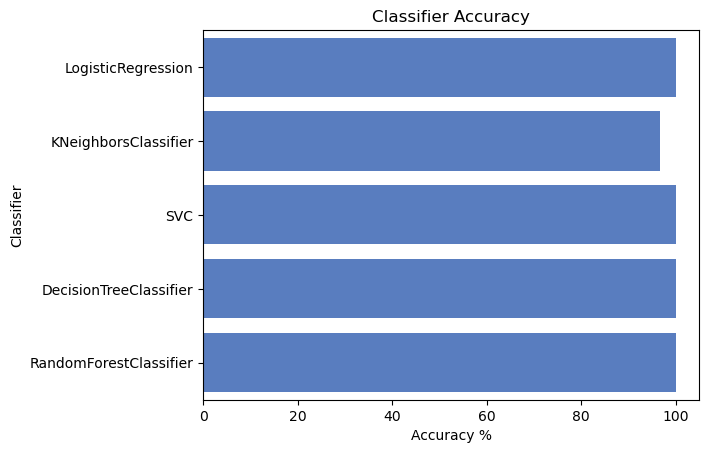

In [57]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [ ]:
Logistic regression, svc, decision tree and random forest has highest accuracy